In [3]:
import evolocity as evo # uses Python 3.7
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [4]:
amino_acids = ["A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]

In [5]:
reference_protein = 'TTSAGESADPVTATVENYGGETQVQRRQHTDIAFILDRFVKVKPKEQVNVLDLMQIPAHTLVGALLRTATYYFSDLELAVKHEGDLTWVPNGAPETALDNTTNPTAYHKEPLTRLALPYTAPHRVLATVYNGSSKYGDTSTNNVRGDLQVLAQKAERTLPTSFNFGAIKATRVTELLYRMKRAETYCPRPLLAIQPSDARHKQRIVAPAKQ'

## Pre-computed Global Evolutionary Vector Field Example for Influenza A Nucleoprotein

In [6]:
adata = evo.datasets.nucleoprotein()
adata

100%|██████████████████████████████████████| 21.7M/21.7M [00:01<00:00, 20.9MB/s]


AnnData object with n_obs × n_vars = 3304 × 1280
    obs: 'n_seq', 'seq', 'gene_id', 'embl_id', 'subtype', 'year', 'date', 'country', 'host', 'resist_adamantane', 'resist_oseltamivir', 'virulence', 'transmission', 'seqlen', 'homology', 'gong2013_step', 'louvain'
    uns: 'louvain', 'neighbors', 'umap'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

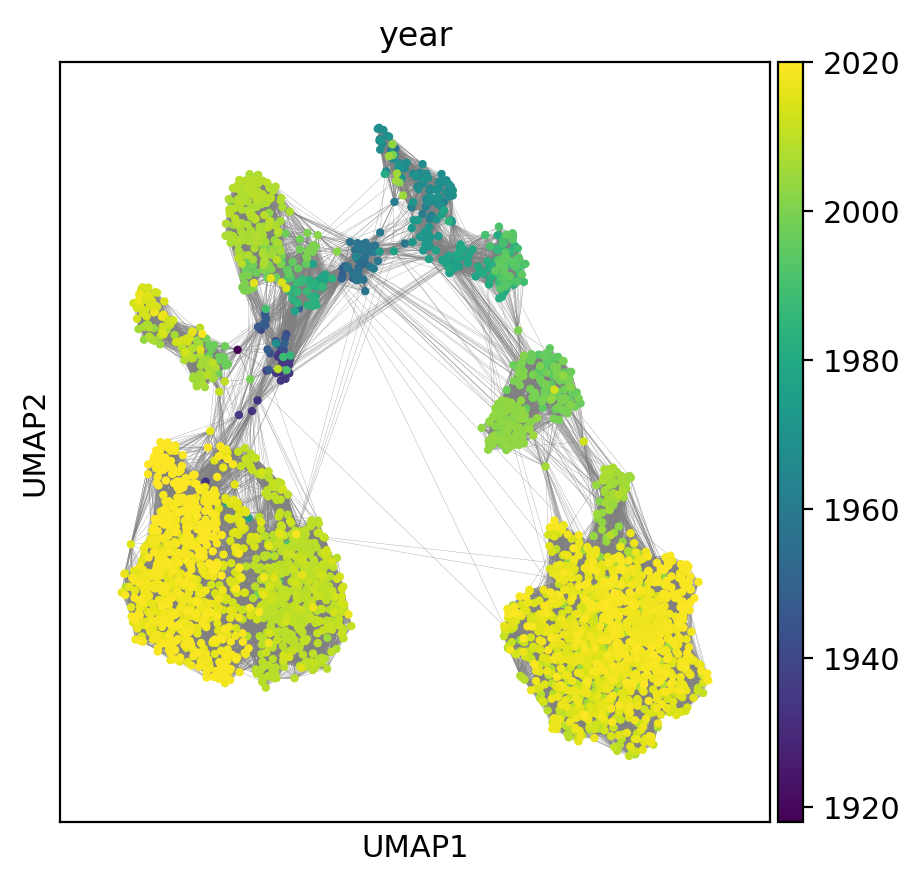

In [7]:
evo.set_figure_params(dpi_save=500, figsize=(5, 5))
sc.pl.umap(adata, color='year', edges=True,)

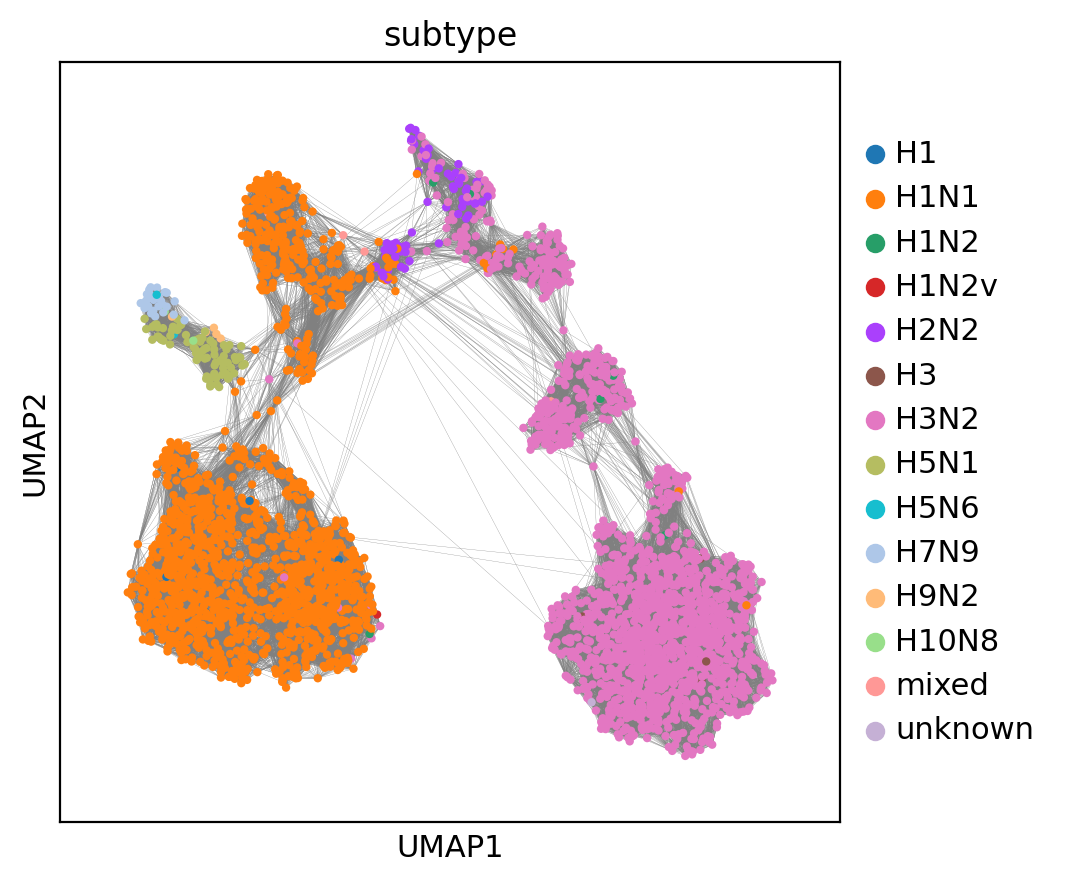

In [8]:
sc.pl.umap(adata, color='subtype', edges=True,)

## Fixing Evolocity Library - NO LONGER REQUIRED 

In [9]:
# # !python -m pip install evolocity
# # !pip install biopython
# import evolocity as evo
# import scanpy as sc

# # Note: evovelocity relies on an older version of biopython which assumes Bio.SubsMat instead of Bio.Align.substitution_matrices
# # Usage of substition matrices have been updated in evolocity\tools\velocity_graph.py lines at 13, 196 and 197

In [10]:
# # Load sequences and compute language model embeddings.
# adata = evo.pp.featurize_seqs(reference_protein)

In [11]:
# # Note: evovelocity relies on an older version of scanpy that uses write_knn_indices as an argument for compute_neighbours which is now depracated
# # Usage of this argument has been removed at evolocity\preprocessing\neighbors.py:163

# # Construct sequence similarity network.
# evo.pp.neighbors(adata)

In [12]:
# # Note: evovelocity relies on an older version of scipy which assumes a coo_matrix has a .A attribute which it no longer has 
# # Usage of this has been changed such that toarray() is used instead of A to convert to dense array
# # at evolocity\tools\velocity_graph.py:399, transition_matrix.py:99 and velocity_embedding.py:152

# # Run evolocity analysis.
# evo.tl.velocity_graph(adata)
# # Embed network and velocities in two-dimensions and plot.
# sc.tl.umap(adata)
# evo.tl.velocity_embedding(adata)

In [13]:
# # Note 1: evovelocity requires a minimum of 50 observations, whereas the fmd sequence only results in 20
# # Usage has been updated such that a minimum of 20 is used resulting in 1 neighbour at evolocity\plotting\velocity_embedding_grid.py:50
# # Note 2: evovelocity relies on an outdated version of matplotlib which makes use of the now deprecated gca()
# # Usage has been updated to replace with add_subplot() with argument projection at evolocity\plotting\utils.py:114
# # Note 3: evovolecity relies on an outdated version of pandas which makes use of is_categorical imported from the wrong folder as it has now been refactored
# # Usage has now been updated such that location is pandas.core.dtypes.common vs pandas.api.types and is_categorical_dtype vs is_categorical at evolocity\plotting\utils.py:50
# evo.pl.velocity_embedding_grid(adata)

In [14]:
# evo.pl.velocity_embedding_stream(adata)

# Applying Evolocity to Single-Residue Mutations for FMD Across 6 positions


In [15]:
from Bio import SeqIO, Entrez
import evolocity as evo
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [16]:
# Entrez.email = "agubaubrey@protonmail.com"

# # Data Source: https://ars.els-cdn.com/content/image/1-s2.0-S101684782307200X-mmc1-molce-sup01.pdf
# # ["AY593786","AY593770","AY593785","AY593782","AY593783"]
# accession_no_list = ["KX784486","KX784485","JQ266911"]

# def fetchIsolateRecord(accession_no):
#     handle = Entrez.efetch(db="nucleotide", id=accession_no, rettype="gb", retmode="text")
#     record = SeqIO.read(handle, "genbank")
#     return record

# def buildSeqList(accession_no_list):
#     seq_list = []
#     for accession_no in accession_no_list:
#         record = fetchIsolateRecord(accession_no)
#         seq = record.seq
#         seq_list.append(seq)
#     return seq_list

# seq_list = buildSeqList(accession_no_list)
# seq_list

In [17]:
# seq_lengths = [len(seq) for seq in seq_list]
# print("Sequence lengths:", seq_lengths)


In [20]:
# Function Source: Kieran's script

# F: generates a list of sequences where every position in the protein sequence is mutated to every possible amino acid by default
# Note: this is only for single-residue mutation - need to update to deal with multiple mutations per sequence
def DMS(reference,start=0,end = None):
  if end == None:
    end = len(reference)
  seq_list = []
  amino_acids = ["A","R","N","D","C","Q","E","G","H","I","L","K","M","F","P","S","T","W","Y","V"]
  for i,ref_amino_acid in enumerate(reference):
      if i>=start and i<=end:
        print(f"Position: {i} | Reference Amino Acid: {ref_amino_acid}")
        for mutant_amino_acid in amino_acids:
            mutated_seq = reference[:i]+mutant_amino_acid+reference[i+1:]
            seq = SeqRecord(Seq(mutated_seq), id=ref_amino_acid+str(i+1)+mutant_amino_acid)
            seq_list.append(seq)
  return seq_list

seqs_of_mutations = DMS(reference_protein,138,143)

Position: 138 | Reference Amino Acid: T
Position: 139 | Reference Amino Acid: S
Position: 140 | Reference Amino Acid: T
Position: 141 | Reference Amino Acid: N
Position: 142 | Reference Amino Acid: N
Position: 143 | Reference Amino Acid: V


In [21]:
def validateSeqs(seq_list):
    illegal_seqs = []
    for i,seq in enumerate(seq_list):
        illegal_chars = [char for char in seq if char not in amino_acids]
        if illegal_chars:
            illegal_seqs.append(i)
            print(f"Illegal characters found in sequence at index {i}: {illegal_chars}")
    if illegal_seqs:
        print(f"Indices of illegal sequences: {illegal_seqs}")
        return False
    else:
        return True
    
def extractSeqs(seqs_of_mutations):
    seq_list = [seq_rec.seq for seq_rec in seqs_of_mutations]
    isValid = validateSeqs(seq_list)
    if isValid:
        return seq_list
    else:
        print("Unable to process seqs")
        return None 

    
seq_list_new = extractSeqs(seqs_of_mutations)
len(seq_list_new)

120

In [27]:
indices = [i for i, x in enumerate(seq_list_new) if x == reference_protein]
print(f"Indices for reference protein: {indices}")

Indices for reference protein: [16, 35, 56, 62, 82, 119]


## Velocity: Estimation and Embeddings

In [22]:
# Load sequences and compute language model embeddings.
adata = evo.pp.featurize_seqs(seq_list_new) 

Embedding sequence batch 1 / 1


In [23]:
# Construct sequence similarity network.
evo.pp.neighbors(adata,n_neighbors=15) # defaul n_neighbors = 50 

computing neighbors
    finished (0:00:35) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


In [24]:
# Run evolocity analysis.
evo.tl.velocity_graph(adata)

# Embed network and velocities in two-dimensions and plot.
#sc.pp.neighbors(adata, n_neighbours=5) # to override default n_neighbors = 15
sc.tl.umap(adata)
evo.tl.velocity_embedding(adata)

100%|█████████████████████████████████████████| 115/115 [03:29<00:00,  1.82s/it]


100%|█████████████████████████████████████████| 115/115 [00:03<00:00, 33.79it/s]



computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


## Velocity: Interpretation of Results
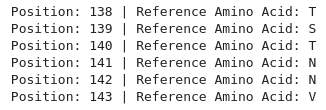

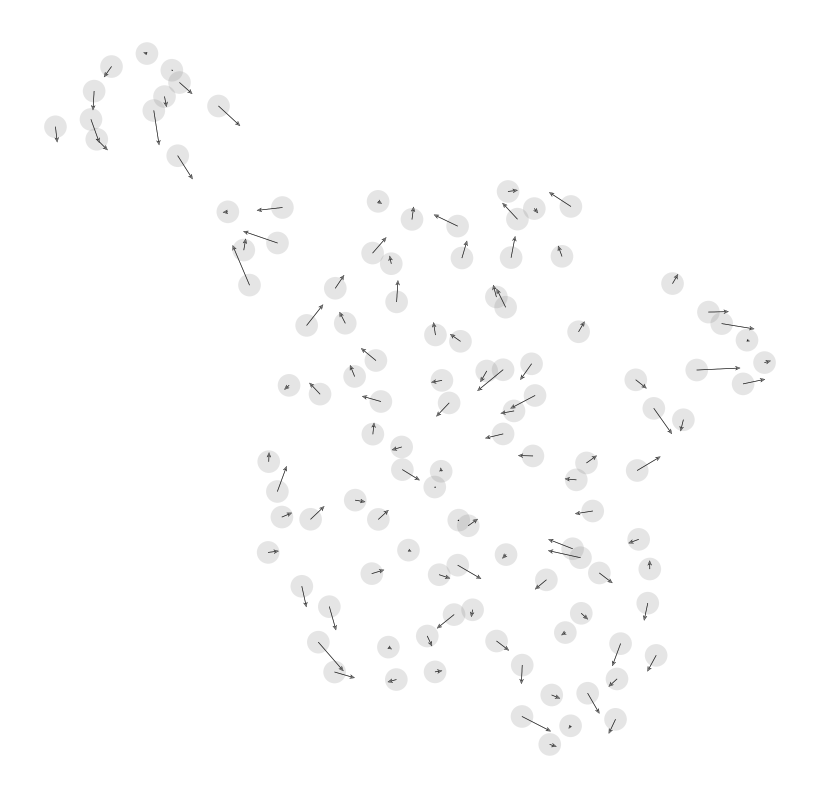

In [29]:
evo.pl.velocity_embedding(adata)

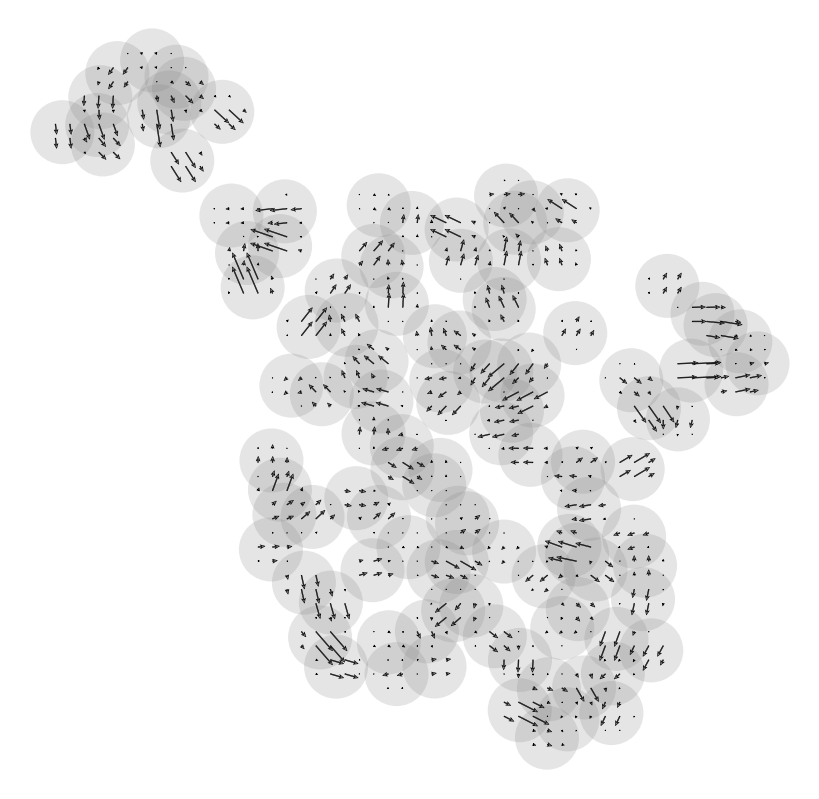

In [30]:
evo.pl.velocity_embedding_grid(adata)

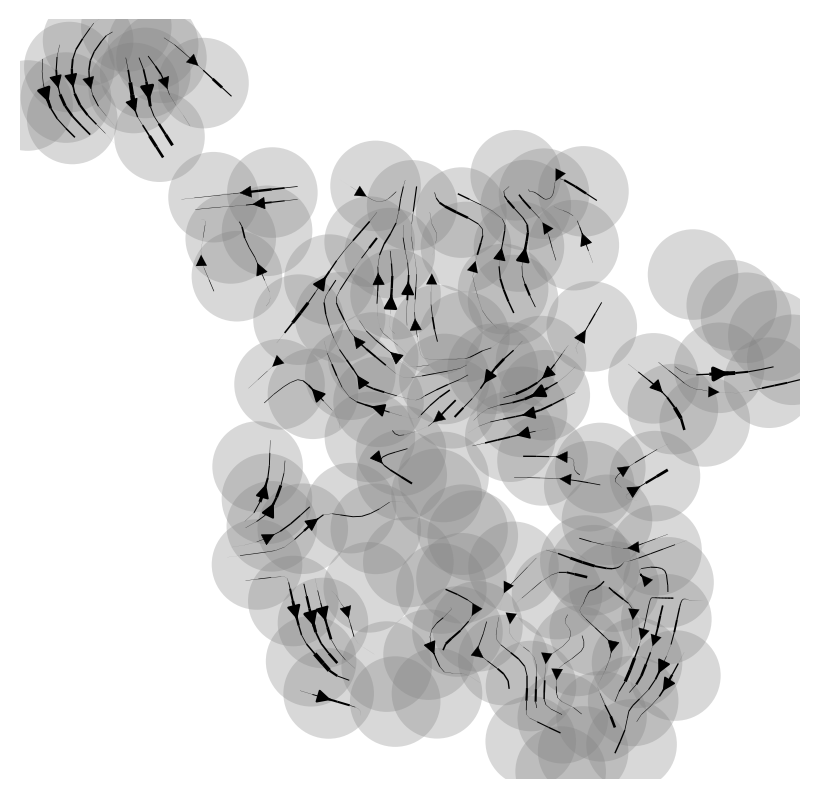

In [31]:
evo.pl.velocity_embedding_stream(adata)

In [45]:
evo.tl.random_walk(adata, root_node=16)
print(adata.uns["rw_paths"])


running random walks
    finished (0:00:00) --> added
    'rw_paths', random walk paths (adata.uns)

[[16 69  2 34 75 33 70 50 15 34 65]]


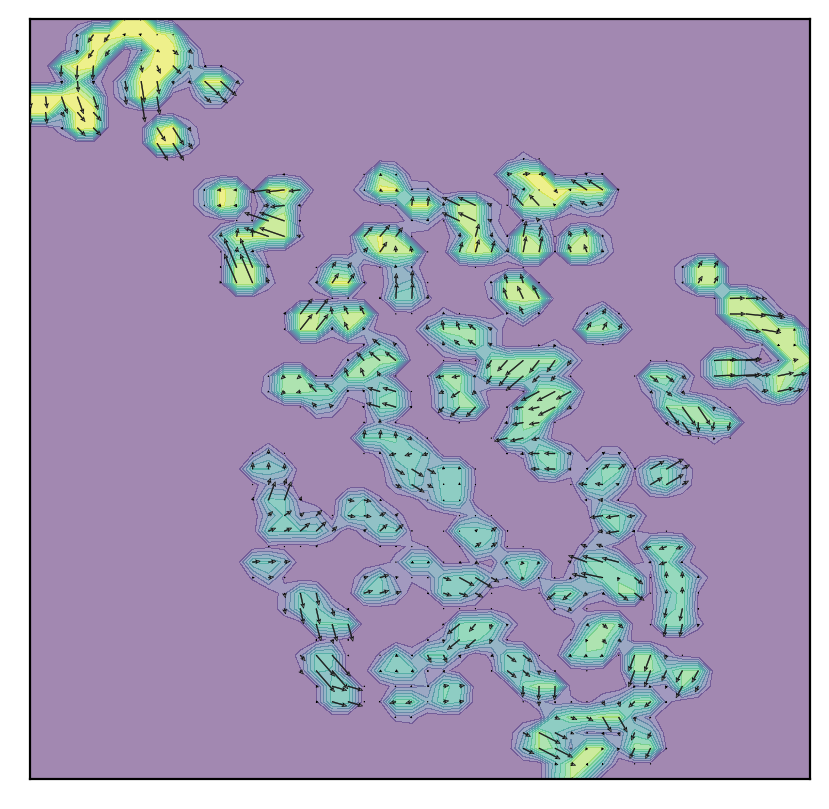

In [49]:
evo.pl.velocity_contour(adata) # with pseudotime

computing terminal states
    identified 1 region of root nodes and 1 region of end points .
    finished (0:00:00) --> added
    'root_nodes', root nodes of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


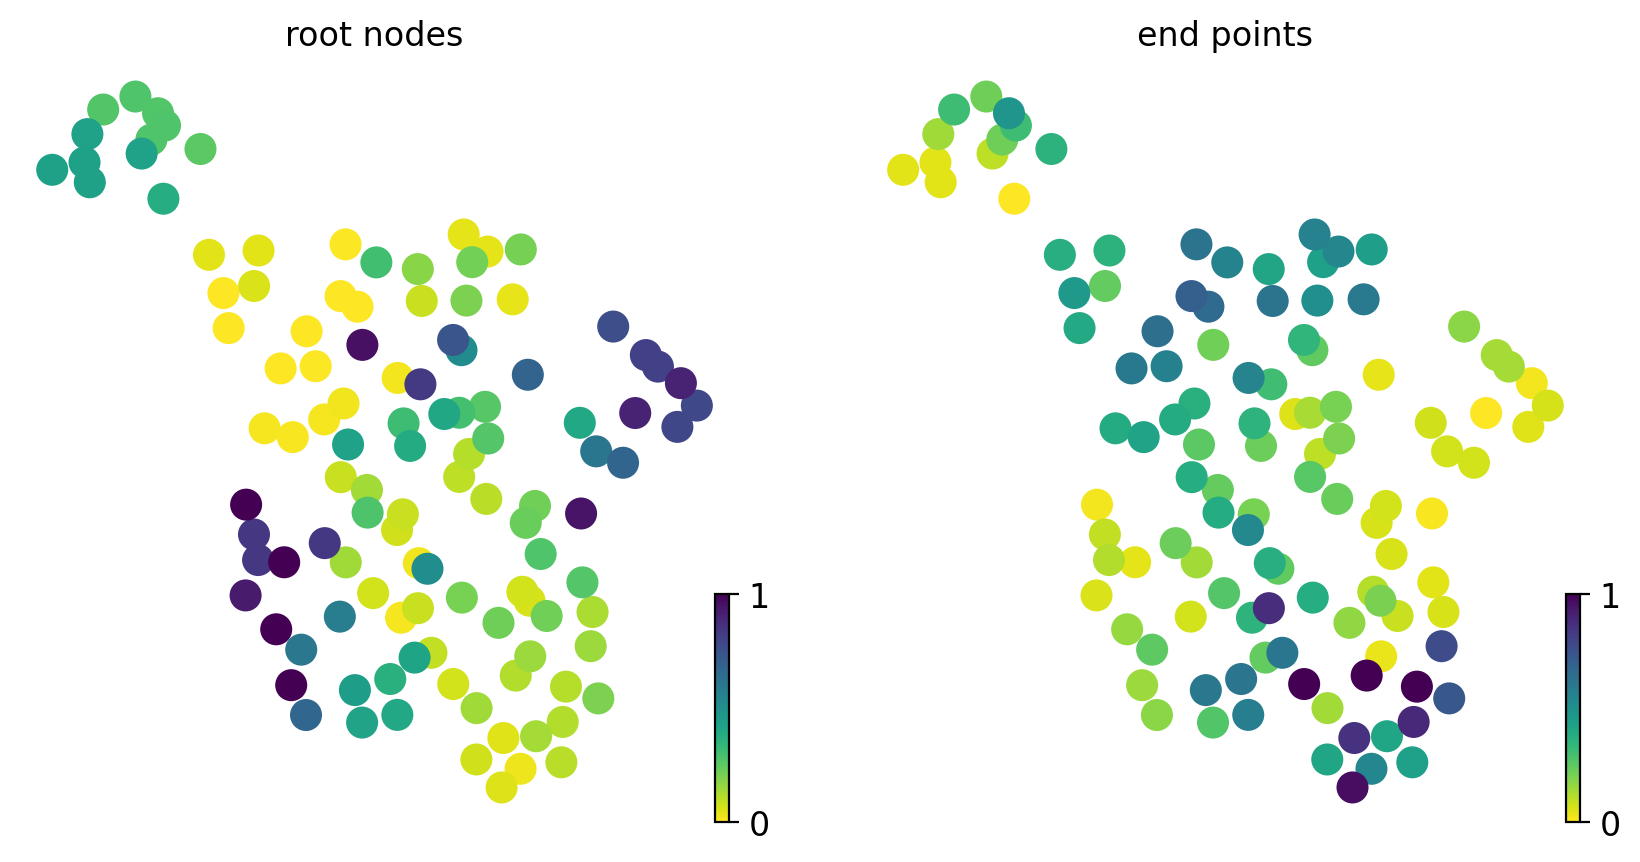

In [58]:
from evolocity.plotting.scatter import scatter
evo.tl.terminal_states(adata)
scatter(adata, color=['root_nodes', 'end_points'])

## Mutations: Scoring using Evolocity 

In [67]:
# To interpret mutations - requires installation of mafft
evo.tl.onehot_msa(adata)
evo.tl.residue_scores(adata)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_onehot', embedded velocity vectors (adata.obsm)


## Mutations: Interpretation of Results

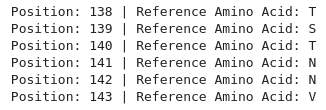

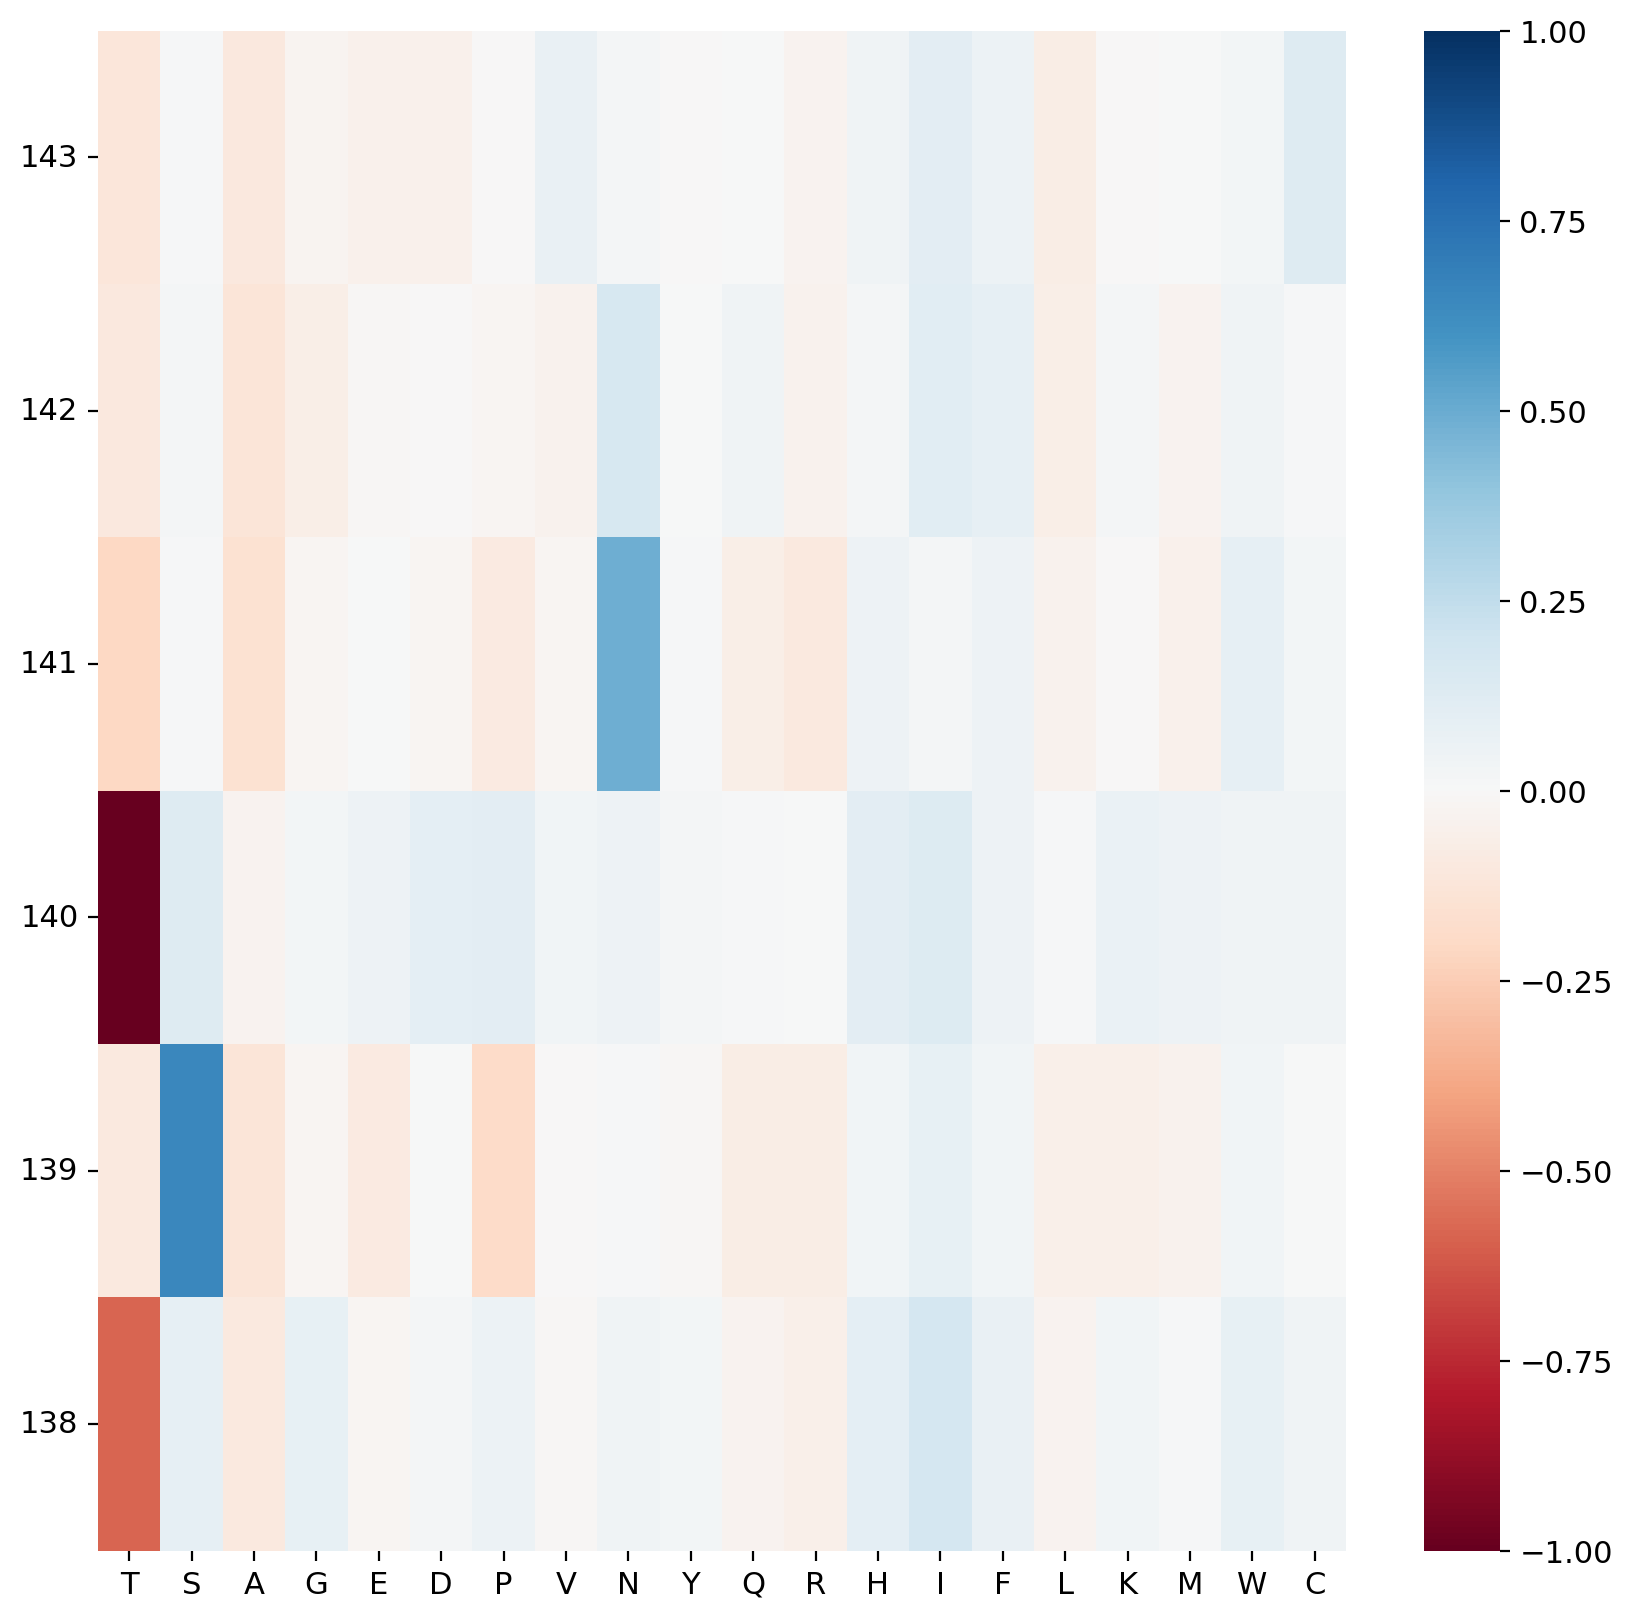

" Velocity Scores \nRange from -1 to 1. \nA score close to 1 (dark blue) means that this residue position favors mutation towards this amino acid as it would benefit the protein's function.\nA score close to 0 (white) means that at this residue position, there is no pressure to mutate to this amino acid - its presence/absence does not affect the protein. \nA score close to -1 (red) means that this residue position resists mutation towards this amino acid as it would harm the protein's function. \n"

In [68]:
ax = evo.pl.residue_scores(adata) # velocity score for each residue
hm = ax.get_children()[0] # QuadMesh object storing heatmap
ax.set_ylim(138,144) # Focus on residues 138-143
plt.show()

''' Velocity Scores 
Range from -1 to 1. 
A score close to 1 (dark blue) means that this residue position favors mutation towards this amino acid as it would benefit the protein's function.
A score close to 0 (white) means that at this residue position, there is no pressure to mutate to this amino acid - its presence/absence does not affect the protein. 
A score close to -1 (red) means that this residue position resists mutation towards this amino acid as it would harm the protein's function. 
'''

Lowest score 1: T143
Lowest score 2: A144
Lowest score 3: T140
Lowest score 4: R142
Lowest score 5: A139
Lowest score 6: A141


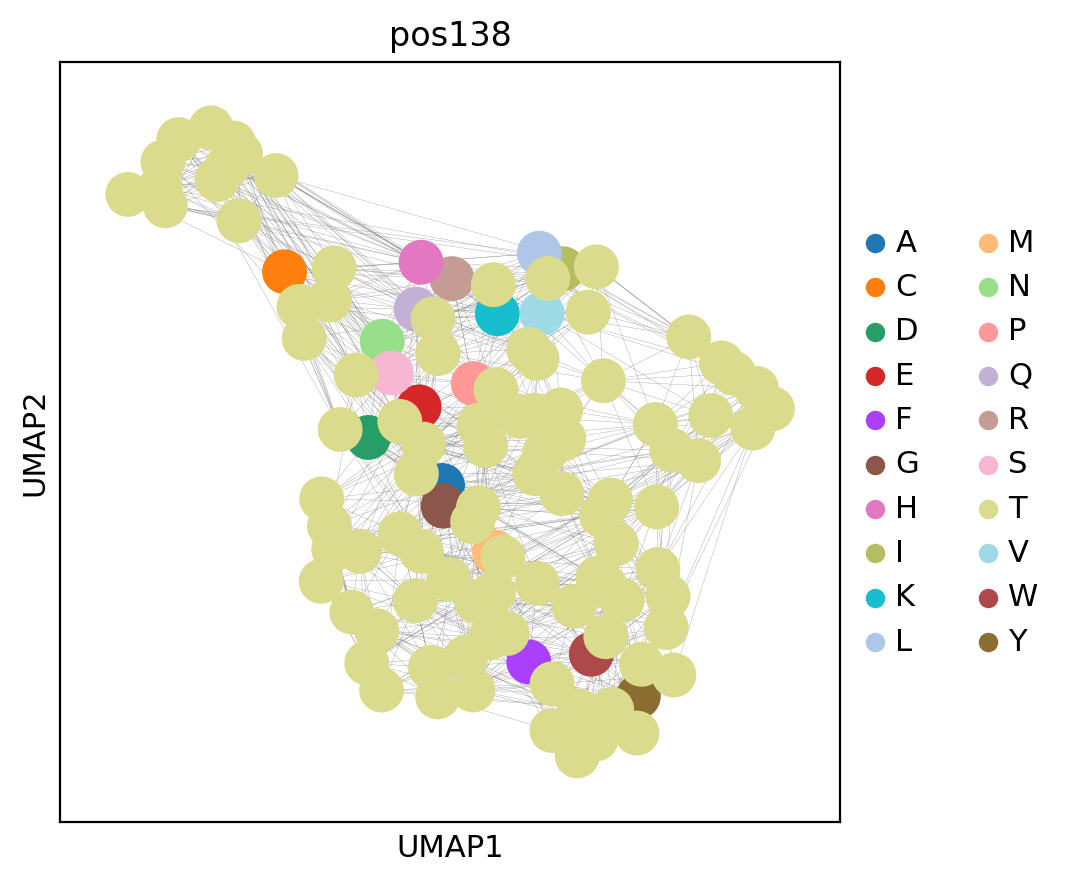

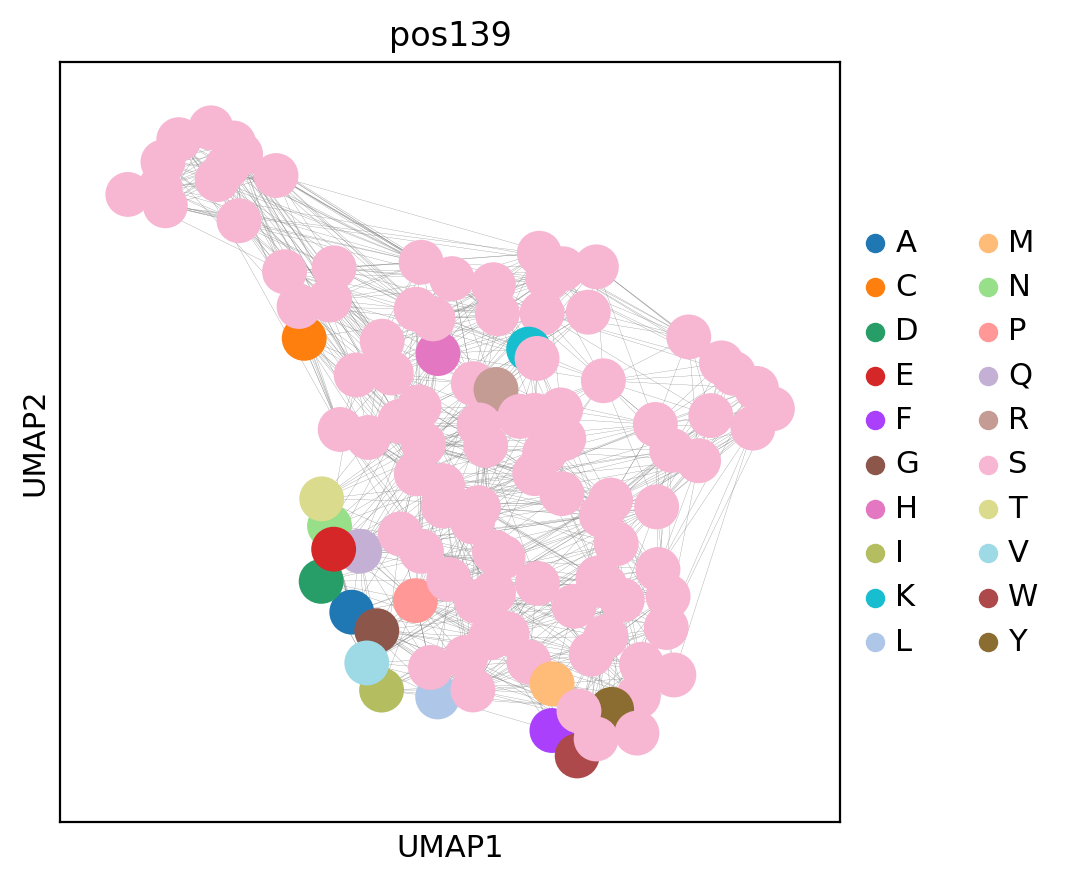

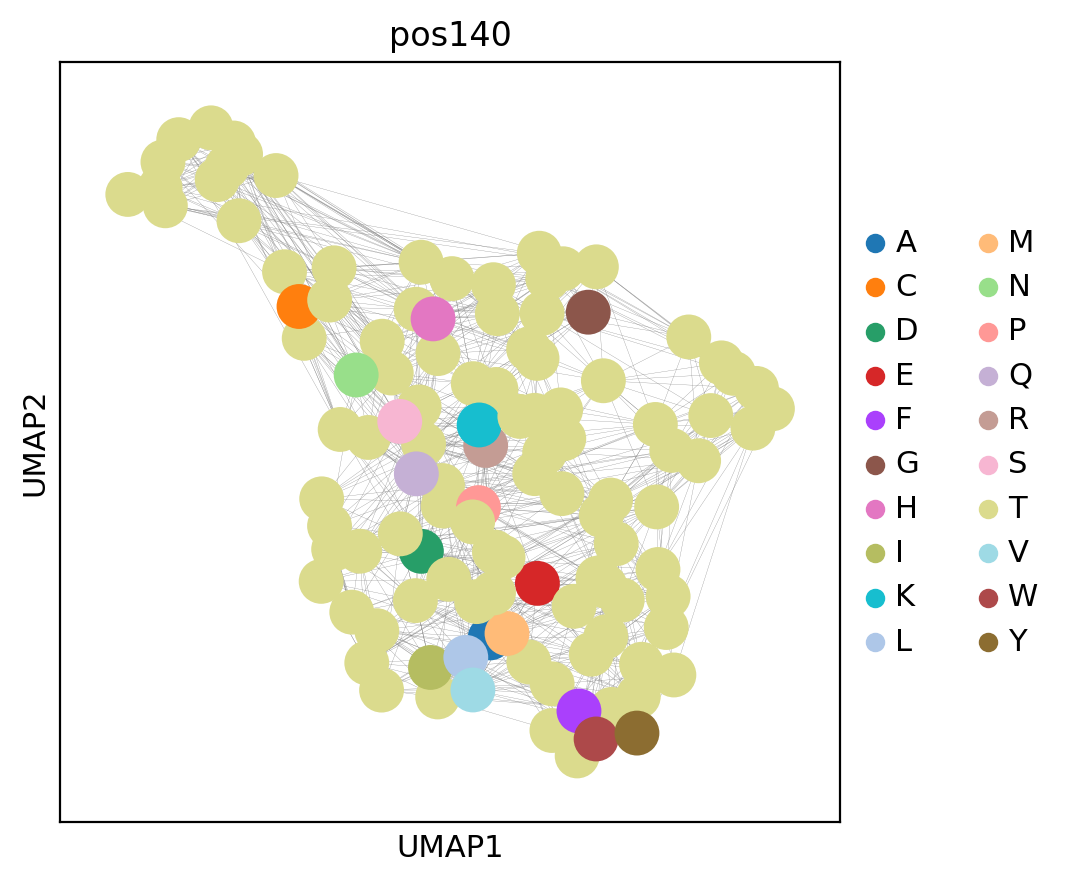

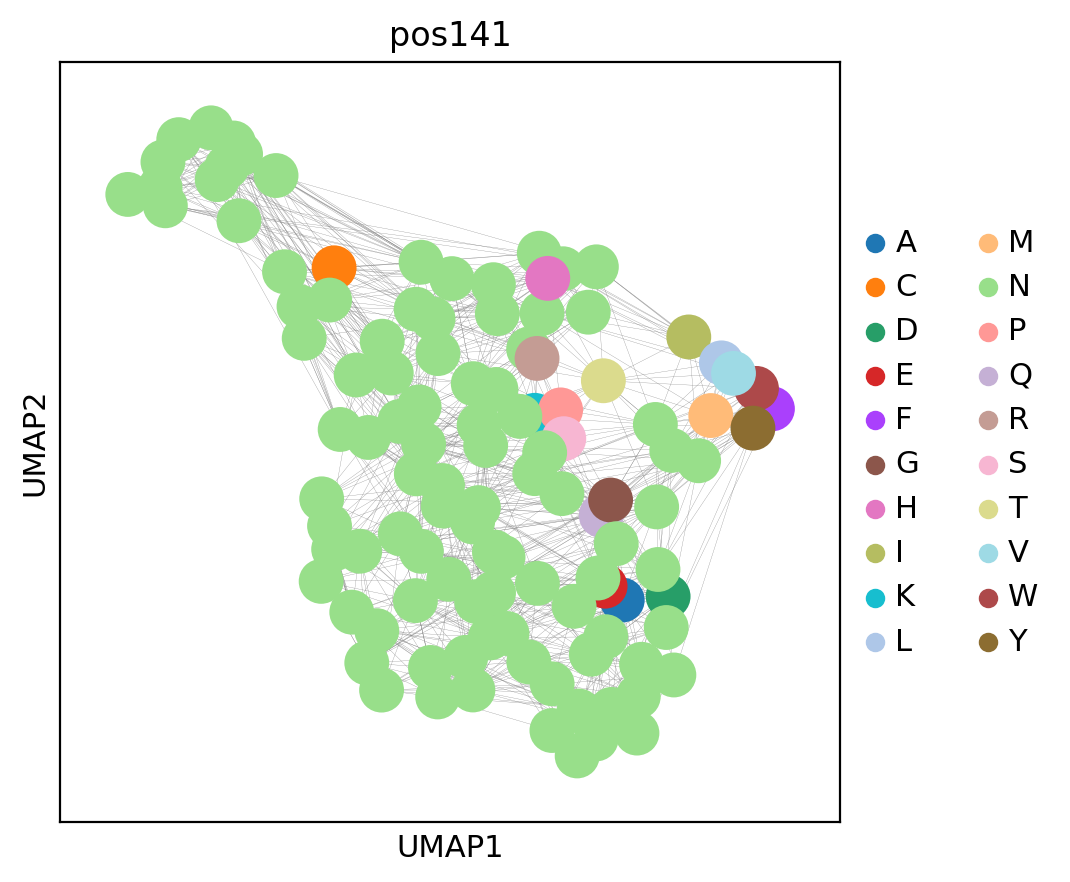

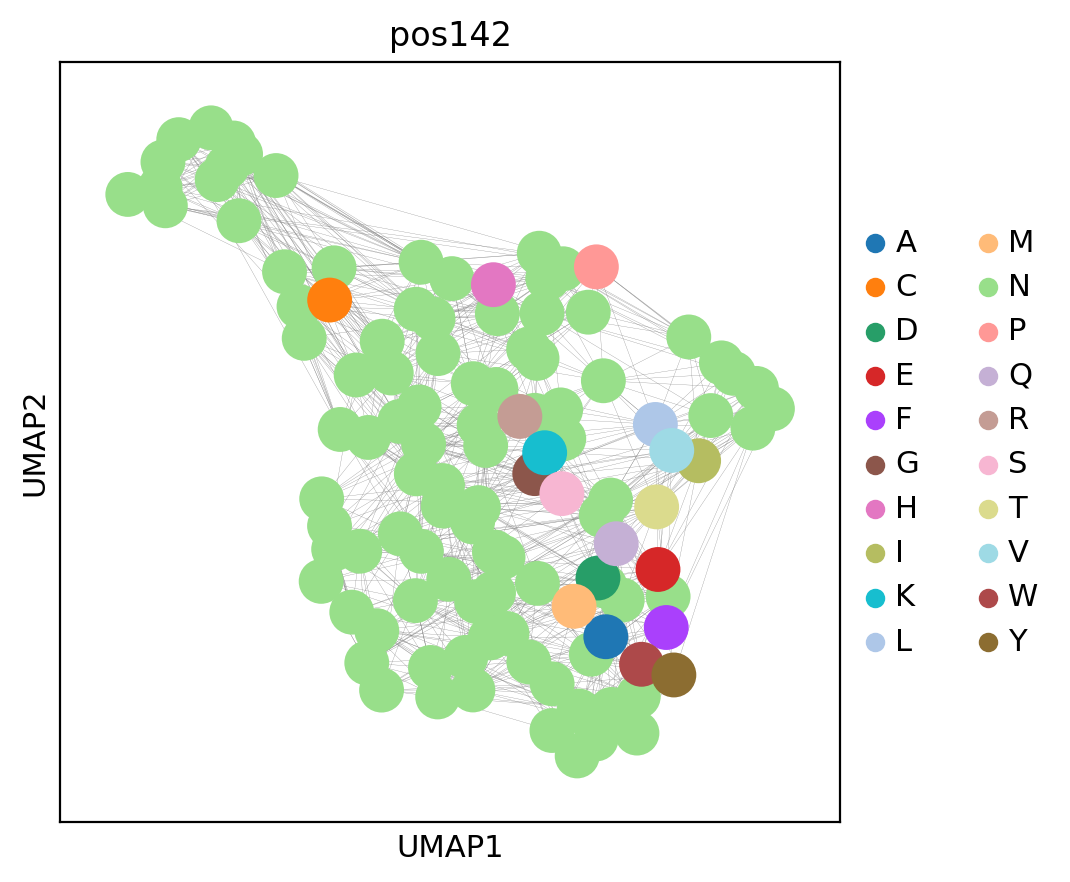

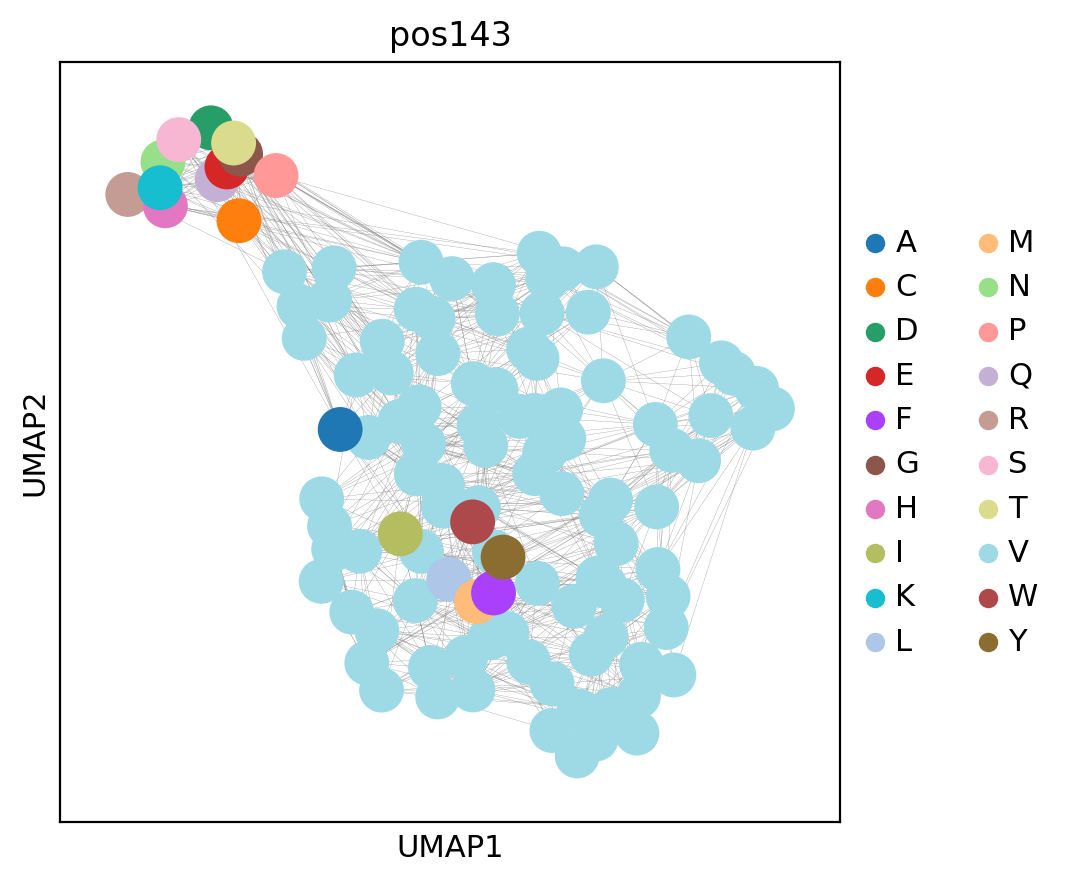

In [64]:
evo.pl.residue_categories(adata,n_plot=6) # scatter map of mutations "strongly associated" with evolocity

In [ ]:
# annotate by position > colour by position in velocity embedding?

In [ ]:
# generate full dataset with multiple mutations at a time > apply evolocity

In [ ]:
# look more into fmd itself (structure)

In [ ]:
# Signle point mutations - use the ESM model to evaluate a pool of of possible mutations (look at logit scores for each position to choose most probable change), build graph at the same time to allow it to backtranch
# note: we do want multiple mutations by the end but accumulate one at a time
# keep track of where i am in the "walk"/"possible paths and kill off any improbable paths i end up in 
# ensure its still functional! eg still 